#Pytorch Computer Vision

## Computer vision libraries in pytorch
* `torchvison` - base domain library for pytorch
* `torchvision.datasets` - Datasets and data loading functions for computer vision
* `torchvision.models` - Get pretrained computer vision models that can be used for your own problem
* `torchvision.transforms` - Functions for manipulating vision data (images) to be suitable for use in a ML model
* `torch.utils.data.Dataset` - Base dataset for pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset (created with torch.utils.data.Dataset)

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(f"PyTorch version: {torch.__version__}\n torchvision version: {torchvision.__version__}")

PyTorch version: 2.3.1+cu121
 torchvision version: 0.18.1+cu121


##Getting a dataset

Will be using FashionMNIST data

In [ ]:
#Setting up training data
training_data = datasets.FashionMNIST(
    root = "data", #Where the data should be downloaded to
    train = True, #Training Dataset?
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None #How to tranform the labels
)

testing_data = datasets.FashionMNIST(
    root = "data", #Where the data should be downloaded to
    train = False, #Training Dataset?
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None #How to tranform the labels
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17742310.20it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 309325.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5458940.49it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9188202.98it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(training_data), len(testing_data)

(60000, 10000)

In [ ]:
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#Checking the shape of images
print(f"Image shape is {image.shape} (Colour Channels, Height, Width), label is {label}")  #The image is black and white thus one colour channel only.

Image shape is torch.Size([1, 28, 28]) (Colour Channels, Height, Width), label is 9


## Visualising the data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

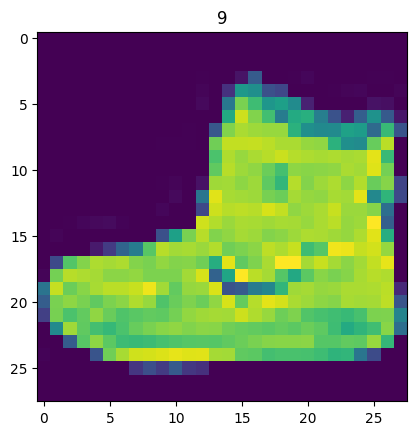

In [ ]:
import matplotlib.pyplot as plt
image, label = training_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze()) # Remove the singular dimension of the image which is colour channels as imshow expects shape 28,28
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

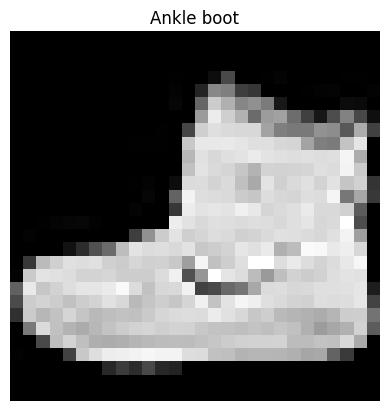

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False)

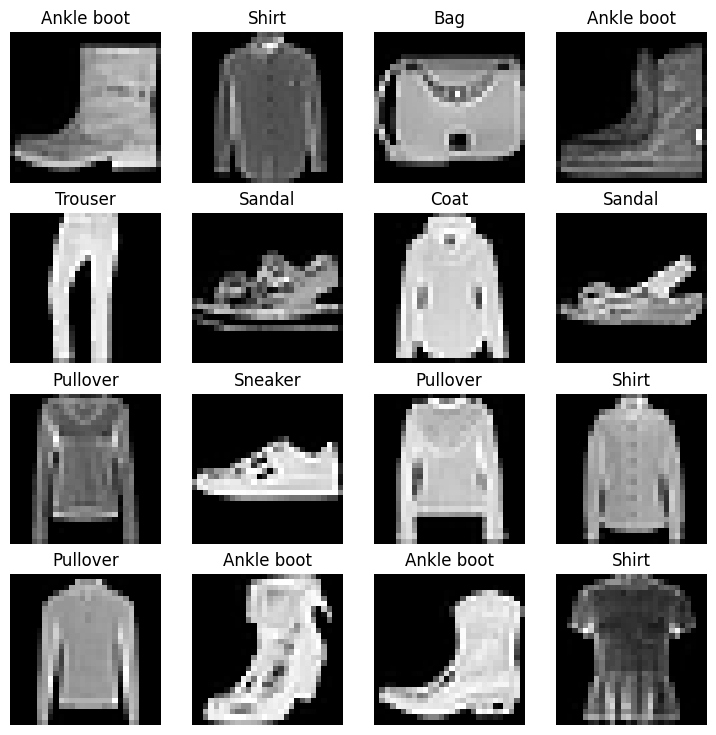

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(training_data), size = [1]).item()
  #Will give random integer between 0 and the length of the training data, size specifies shape of output tensor, 1 means tensor with a single element
  # .item() converts the tensor to a single number
  image, label = training_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

Our data is in the form of a pytorch dataset currently

DataLoader turns the pytorch dataset to a python iterable

We need to turn our data into mini batches as

1. It is more computationally efficient as a large size of images may not be stored in memory at one time

2. Gives neural network more chances to update its gradients per epoch

In [ ]:
from torch.utils.data import DataLoader

#Setup batch size
BATCH_SIZE = 32

#Turn dataset into iterables
train_dataloader = DataLoader(dataset = training_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True) #If images will be ordered then NN will learn the order of images which we dont want so shuffle the images around

test_dataloader = DataLoader(dataset = testing_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False) #Model hasnt seen data so order doesnt matter

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f153ca17be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f153efefcd0>)

In [ ]:
print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of Training DataLoader : {len(train_dataloader)} with batches of {BATCH_SIZE}")
print(f"Length of Testing DataLoader : {len(test_dataloader)} with batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f153ca17be0>, <torch.utils.data.dataloader.DataLoader object at 0x7f153efefcd0>)
Length of Training DataLoader : 1875 with batches of 32
Length of Testing DataLoader : 313 with batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
#The iter() function in Python is used to get an iterator from an iterable object(train_dataloader)
#The next() function is used to get the next item from an iterator. In our case
train_features_batch.shape, train_labels_batch.shape, len(train_features_batch)
#test_features_batch, test_labels_batch = next(iter(test_dataloader))

(torch.Size([32, 1, 28, 28]), torch.Size([32]), 32)

Image Size: torch.Size([1, 28, 28])
Label : 6, label size : torch.Size([])


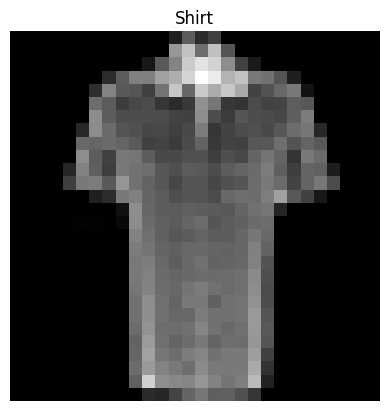

In [ ]:
#Sample Example
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {image.shape}")
print(f"Label : {label}, label size : {label.shape}")

## Model 0: Building a baseline model

When starting to build a series of machine learning modelling experiments, it is best to start with a baseline model

A baseline model is a simple model which we will try to improve with further experimentation.

Start simply and add complexity as needed

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)
# Flatten is used to reshape (or flatten) the input tensor into a two-dimensional tensor
# where the first dimension represents the batch size and the second dimension represents the remaining elements in the input tensor
# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionModelV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
# Setup Model
model_0 = FashionModelV0(
    input_shape = 784, #28*28
    hidden_units = 16,
    output_shape = len(class_names)
)
model_0.to("cpu")

FashionModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x) #10 logit values for 10 different classes

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

### Optimizer, loss function and evaluation metrics

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
#Importing accuracy metric from helper functions
from helper_functions import accuracy_fn
#Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### Function to time the experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu: 0.000 seconds


5.9539000005770504e-05

## Creating a training loop and training on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perfrom testing steps, calculate the test loss *per batch*
4. Print what is happening
5. Time it all



In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step() #Optimizer will update model's parameters once per batch rather than once per epoch(inside batch for loop)

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            # batch * len(image) : How many batches have we looked at
            # len(train_dataloader.dataset) : Total number of items we have in our dataset

    #Divide Total Train Loss by Length of train data loader(Number of batches) in order to get the average loss per batch
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
      #for batch , (image, label) in enumerate(test_dataloader):
      for batch, (X, y) in enumerate(test_dataloader):
        #test data loader has completely different data than train data loader so we don't need different variables like
        #X_train and y_train, X_test and y_test like we did before. data loader has already divided the dataset into train and test.
        # 1. Forward pass
        test_pred = model_0(X)

        # 2. Calculate loss (accumatively)
        test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

        # 3. Calculate accuracy (preds need to be same as y_true)
        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        #test_pred.argmax(dim = 1) : As we have 10 logit values for 10 classes we need the maximum value in order to get the class label with the highest probability
        #Comparing labels to labels

    # Calculations on test metrics need to happen inside torch.inference_mode()
    #Calculate average test loss per batch
      test_loss /= len(test_dataloader)

    #Calculate average test accuracy per batch
      test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.58506 | Test loss: 0.50618, Test acc: 82.24%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47503 | Test loss: 0.48423, Test acc: 83.07%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45409 | Test loss: 0.47700, Test acc: 83.41%

Train time on cpu: 32.021 seconds


In [ ]:
str(next(model_0.parameters())) #next is an iterable.

'Parameter containing:\ntensor([[ 0.0273,  0.0296, -0.0078,  ..., -0.0153,  0.0103,  0.0154],\n        [-0.0188, -0.0350,  0.0203,  ..., -0.0117,  0.0037,  0.0136],\n        [-0.0007,  0.0012,  0.0027,  ...,  0.0170, -0.0014,  0.0060],\n        ...,\n        [-0.0315, -0.0201, -0.0302,  ..., -0.0095, -0.0023,  0.0079],\n        [-0.0301, -0.0315, -0.0171,  ..., -0.0552,  0.0034, -0.0063],\n        [-0.0150, -0.0168, -0.0044,  ...,  0.0615,  0.0282, -0.0259]],\n       requires_grad=True)'

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## Evaluate Model 0

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Make Prediction
      y_pred = model(X)
      # Accumulate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1)) #Max value of predicted logits, could use softmax to get predicition but wont make a difference
    #Average loss per batch
    loss /= len(data_loader)
    acc /= len(data_loader)


  return {"Model Name:": model.__class__.__name__, #Only works when model was created with a class
          "Model Loss:": loss.item(), #Scaled to a single value by .item()
          "Model Accuracy:": acc}

#Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

##Setup Device Agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

## Building Model 1 with non linearity


In [ ]:
class FashionModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flatten inputs into a single vector
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionModelV1(input_shape = 784, # 28*28 after flatten
                         hidden_units = 10,
                         output_shape = len(class_names))
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###Loss, optimizer and evaluation metrics for Model 1

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)


### Creating Functions for training and testing loop

* training loop - train_step()
* testing loop - test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training loop step with model trying to learn on data loader"""
  train_loss, train_acc = 0, 0
  model.train()
  for batch , (X, y) in enumerate(data_loader):
    #Put data on target device
    X , y = X.to(device), y.to(device)
    #1. Forward Pass
    y_pred = model(X)

    #2. Calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulatively add up the loss per epoch
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward
    loss.backward()

    #5. Optimizer Step
    optimizer.step()

  #Divide Total Train Loss by Length of train data loader(Number of batches) in order to get the average loss per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data loader"""
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(data_loader):
      #1. Forward Pass
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      #2. Calculate Loss and Accuracy per batch
      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))

    #Average loss and accuracy per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f} \n")

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_start_time_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n-------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_end_time_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_start_time_gpu, end = train_end_time_gpu , device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-------
Train Loss: 1.09199 | Train Accuracy: 61.34
Test Loss: 0.95636 | Test Accuracy: 65.00 

Epoch : 1
-------
Train Loss: 0.78101 | Train Accuracy: 71.93
Test Loss: 0.72227 | Test Accuracy: 73.91 

Epoch : 2
-------
Train Loss: 0.67027 | Train Accuracy: 75.94
Test Loss: 0.68500 | Test Accuracy: 75.02 

Train time on cuda: 35.975 seconds


In [ ]:
model_0_results

{'Model Name:': 'FashionModelV0',
 'Model Loss:': 0.47699886560440063,
 'Model Accuracy:': 83.40654952076677}

In [ ]:
total_train_time_model_0

32.021038051000005

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """Returns a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():

    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      #Make Prediction
      y_pred = model(X)
      # Accumulate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1)) #Max value of predicted logits, could use softmax to get predicition but wont make a difference
    #Average loss per batch
    loss /= len(data_loader)
    acc /= len(data_loader)


  return {"Model Name:": model.__class__.__name__, #Only works when model was created with a class
          "Model Loss:": loss.item(), #Scaled to a single value by .item()
          "Model Accuracy:": acc}


In [ ]:
# Model 1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

{'Model Name:': 'FashionModelV1',
 'Model Loss:': 0.6850008964538574,
 'Model Accuracy:': 75.01996805111821}

In [ ]:
model_0_results

{'Model Name:': 'FashionModelV0',
 'Model Loss:': 0.47699886560440063,
 'Model Accuracy:': 83.40654952076677}

## Model 2: Building a Convolutional Neural Network(CNN)

CNN's are also known as ConvNets

Known for their capability to find patterns in visual data

https://poloclub.github.io/cnn-explainer/


In [ ]:
class FashionModelV2(nn.Module):
  """Replicating tinyVGG from cnn explainer"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        #Conv Layer, in_channels = colour channels
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        #Conv Layer
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        #Output layer
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, #Trick to calculate the output shape: Check what output you are getting from flatten e.g here we got 490
                  out_features = output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output of first conv block {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output of second conv block {x.shape}")
    x = self.classifier(x)
    #print(f"Output of classifier {x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionModelV2(input_shape = 1, #Black and white image thus one colour channel thus input shape = 1,
                         hidden_units = 10,
                         output_shape = len(class_names))
model_2.to(device)
model_2

FashionModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
#Pass Image through tensor
model_2(rand_image_tensor.unsqueeze(dim = 0).to(device))
#RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10)
#Output of second conv block torch.Size([1, 10, 7, 7]) -> Gets passed to flatten which does 1 * 10 * 7 * 7
#Shows that the output of flatten is 490 so we need to change the input features of our classifier accordingly thus hidden_units * 7 * 7

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Image Batch shape: {images.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test Image: \n {test_image}")

Image Batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test Image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
#test_image = test_image.unsqueeze(0)
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#Creating a single sample conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3, #Same as tuple (3, 3), it is a filter of size 3,3 going over the whole image
                       stride = 1, #How many pixels to skip
                       padding = 0) #Do we need to add extra pixels at the corners

#Pass data through convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

###Stepping through `nn.MaxPool2d()`

In [ ]:
print(f"Test Image original shape {test_image.shape}")
print(f"Test Image with unsqueezed 0 th dimension {test_image.unsqueeze(dim = 0).shape}")

#Creating a single sample maxpool 2d layer
maxpool_layer = nn.MaxPool2d(kernel_size = 2)
#Pass data through just the conv layer
test_image_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through Conv layer {test_image_conv.shape}")
#Pass data through maxpool layer
test_image_maxpool = maxpool_layer(test_image_conv)
print(f"Shape after going through maxpool layer {test_image_maxpool.shape}")

Test Image original shape torch.Size([3, 64, 64])
Test Image with unsqueezed 0 th dimension torch.Size([1, 3, 64, 64])
Shape after going through Conv layer torch.Size([1, 10, 62, 62])
Shape after going through maxpool layer torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
#Creating a random tensor with similar number of dimensions to our image
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f"Random Tensor shape: \n {random_tensor.shape}")
#Create a maxpool layer
maxpool_layer = nn.MaxPool2d(kernel_size = 2)
#Pass the random tensor through maxpool
maxpool_tensor = maxpool_layer(random_tensor)
print(f"Max Pool Tensor: \n{maxpool_tensor} \n")
print(f"Max Pool Tensor Shape: \n {maxpool_tensor.shape} \n")
print(f"Random Tensor: {random_tensor}")

Random Tensor shape: 
 torch.Size([1, 1, 2, 2])
Max Pool Tensor: 
tensor([[[[0.3367]]]]) 

Max Pool Tensor Shape: 
 torch.Size([1, 1, 1, 1]) 

Random Tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])


### Training the CNN on Fashion MNIST Dataset

In [ ]:
#Setup Loss function and optimizer for model_2
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### Training and Testing CNN Model 2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Measure Time
from timeit import default_timer as timer
train_start_time_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

  train_end_time_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_start_time_model_2,
                                              end = train_end_time_model_2,
                                              device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train Loss: 0.59397 | Train Accuracy: 78.50
Test Loss: 0.39297 | Test Accuracy: 85.86 

Train time on cuda: 14.584 seconds
Epoch: 1

Train Loss: 0.36126 | Train Accuracy: 87.03
Test Loss: 0.35555 | Test Accuracy: 86.59 

Train time on cuda: 29.280 seconds
Epoch: 2

Train Loss: 0.32356 | Train Accuracy: 88.34
Test Loss: 0.32253 | Test Accuracy: 88.28 

Train time on cuda: 43.694 seconds


In [ ]:
# Get model_2 state dictionary
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_2_results

{'Model Name:': 'FashionModelV2',
 'Model Loss:': 0.3225289285182953,
 'Model Accuracy:': 88.27875399361022}

## Comparing results and training times

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,Model Name:,Model Loss:,Model Accuracy:
0,FashionModelV0,0.476999,83.406550
1,FashionModelV1,0.685001,75.019968
2,FashionModelV2,0.322529,88.278754


In [ ]:
#Add training time results comparison
compare_results["Training Time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,Model Name:,Model Loss:,Model Accuracy:,Training Time
0,FashionModelV0,0.476999,83.406550,32.021038
1,FashionModelV1,0.685001,75.019968,35.975407
2,FashionModelV2,0.322529,88.278754,43.693885


Text(0, 0.5, 'model')

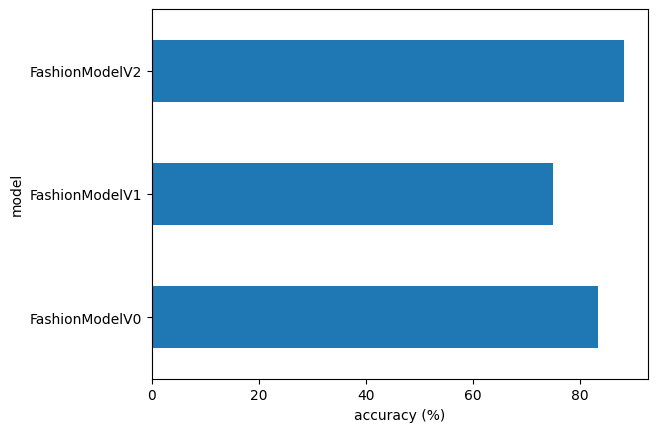

In [ ]:
#Visualising the model results
compare_results.set_index("Model Name:")["Model Accuracy:"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions with best model 2

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Preparing the sample (add a batch dimension and pass to device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      #Forward Pass (model outputs raw logits)
      pred_logit = model(sample)

      #Getting prediction probabilities logits->probs
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      #Getting pred_probs off the GPU for further clarifications
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_probs to turn the list into a tensor
  return torch.stack(pred_probs)

In [ ]:
testing_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(testing_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

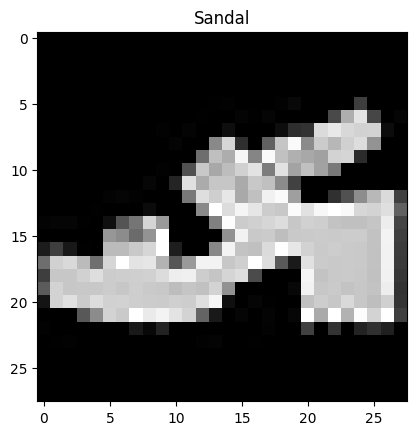

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples) #Same as the data samples we have created in above for
#View first two prediction probabilities
pred_probs[:2]

tensor([[4.7257e-08, 1.1238e-08, 1.4672e-08, 1.7687e-08, 2.3511e-09, 9.9994e-01,
         4.9736e-08, 5.3449e-06, 3.8731e-06, 5.3404e-05],
        [6.6960e-02, 5.0099e-01, 4.7306e-03, 6.8906e-02, 1.7739e-01, 8.4417e-05,
         1.8049e-01, 5.6285e-05, 6.9973e-05, 3.3377e-04]])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
#Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

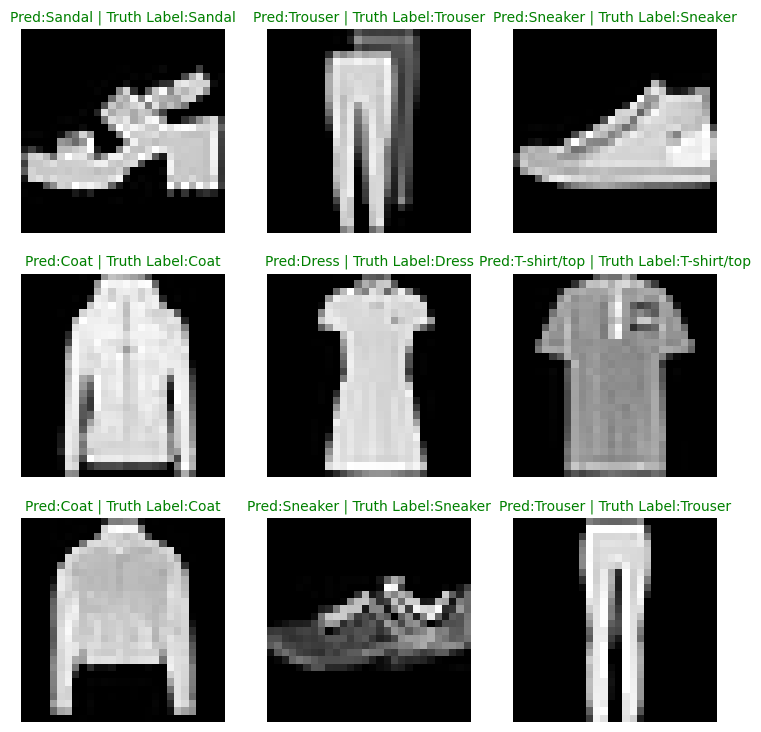

In [ ]:
#Plot predictions
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows, ncols, i+1)
  #Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")
  #Find prediction in text form
  pred_label = class_names[pred_classes[i]]
  #Get true value
  truth_label = class_names[test_labels[i]]
  #Title for plot
  title_text = f"Pred:{pred_label} | Truth Label:{truth_label}"
  #Check for equality between prediciton and actual and set text colour based on that
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g") #Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize = 10, c = "r") #Red text if prediction is wrong

  plt.axis(False)

##Making confusing matrix

1. Make predictions with our trained model on the test dataset

2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`

3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [ ]:
import mlxtend
from tqdm.auto import tqdm
#1. Make predictions
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making Predictions"):
    #Send the data to target device
    X, y = X.to(device), y.to(device)
    #Forward pass
    y_logit = model_2(X)
    #Turn predictions from logits to prediction probabilities to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
    #Put predictions on cpu for evaluations
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_preds_tensor = torch.cat(y_preds) #Concatenate all the predictions for the batches into one single tensor
y_preds_tensor[:5]

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6])

In [ ]:
len(y_preds[1]), len(y_preds) #313 * 32

(32, 313)

In [ ]:
len(y_preds_tensor)

10000

In [ ]:
try:
  import torchmetrics, mlxtend
  print(mlxtend.__version__)
except:
  !pip install -U mlxtend -q torchmetrics
  print(f"{mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.3 MB/s eta 0:00:00
0.23.1


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
testing_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

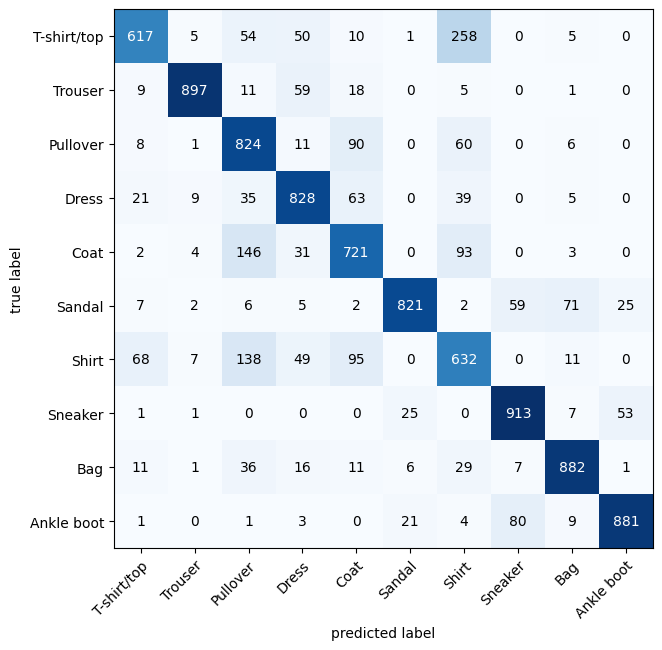

In [ ]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup Confusion Matrix instance and evaluate the model (compare predictions to targets)

confmat = ConfusionMatrix(num_classes = len(class_names), task = "multiclass")
confmat_tensor = confmat(preds = y_preds_tensor,
                         target = testing_data.targets)

#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #motplotlib works with numpy
    class_names = class_names,
    figsize = (10, 7)
)

## Saving and loading best performing model

In [ ]:
from pathlib import Path
#Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

#Create Model save path
MODEL_NAME = "03_pytorch_computer_vision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision.pth


In [ ]:
#Loading the model
torch.manual_seed(42)
loaded_model_2 = FashionModelV2(input_shape = 1,
                                hidden_units = 10,
                                output_shape = 10) #len(class_names)
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

#Send the model to target device
loaded_model_2.to(device)


FashionModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'Model Name:': 'FashionModelV2',
 'Model Loss:': 0.3225289285182953,
 'Model Accuracy:': 88.27875399361022}

In [ ]:
#Evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

{'Model Name:': 'FashionModelV2',
 'Model Loss:': 0.3225289285182953,
 'Model Accuracy:': 88.27875399361022}

In [ ]:
#Check if model results are close
torch.isclose(torch.tensor(model_2_results["Model Loss:"]),
              torch.tensor(model_2_results["Model Loss:"]),
              atol = 1e-02)

tensor(True)

## Pytorch computer vision completed here, exercise in different notebook